## **DSN and Microsoft Skills for Job**

Wazobia Real Estate Limited is a prominent real estate company operating in Nigeria. With a vast portfolio of properties, they strive to provide accurate and competitive pricing for houses. However, they have been facing challenges in accurately predicting the prices of houses in the current market. To overcome this hurdle, Wazobia Real Estate Limited is seeking the expertise of data scientists like you to develop a robust predictive model.

The objective of this hackathon is to create a powerful and accurate predictive model that can estimate the prices of houses in Nigeria. By leveraging the provided dataset, you will analyze various factors that impact house prices, identify meaningful patterns, and build a model that can generate reliable price predictions. The ultimate goal is to provide Wazobia Real Estate Limited with an effective tool to make informed pricing decisions and enhance their competitiveness in the market.

## **SETUP**

In [1]:
import os
from google.colab import drive

## Mounting Google Colab to Drive
drive.mount('/content/drive')

## Change the working directory to the drive folder
%cd drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
## Fork the repository 🍴
!git clone https://github.com/AbdulmumeenAbi6/DSN2023BootcampQualificationProject

Cloning into 'DSN2023BootcampQualificationProject'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 23 (delta 2), reused 23 (delta 2), pack-reused 0
Receiving objects: 100% (23/23), 458.10 KiB | 4.24 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
## Change working directory to the project folder
os.chdir('DSN2023BootcampQualificationProject')

In [5]:
## Install requirements
%%capture
!pip install -r requirement.txt

## **Libraries**

In [6]:
## Miscaleneous Libraries
import numpy as np
import pandas as pd

## Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Preprocessing Libraries
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

## Modelling Libraries
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

## Filter warnings
import warnings
warnings.filterwarnings("ignore")

## **CONFIG**

In [7]:
class CFG:

  xgb_param1 = {'colsample_bytree': 0.5,
              'learning_rate': 0.1, 'max_depth': 5,
              'min_child_weight': 3,
              'n_estimators': 200,
              'objective': 'reg:squarederror',
              'subsample': 0.7}

  xgb_param2 = {"booster":'gbtree',
              "colsample_bytree":0.8,
              "eta":0.3, "eval_metric":'rmse',
              "gamma":0.3,  "max_depth":2,
                "min_child_weight":4,  "n_estimators":500}

  xgb_param3 = {"booster":'gbtree',
              "colsample_bytree":0.8, "eta":0.3,
              "eval_metric":'rmse',
              "gamma":0.3,  "max_depth":5,
              "min_child_weight":4,
              "n_estimators":200,
              'learning_rate': 0.1,
              'objective': 'reg:squarederror',
              'subsample': 0.7}

  cat_param1 = {'depth': 6, 'iterations': 50,
                'l2_leaf_reg': 6, 'learning_rate': 0.5}

  rf_param1 = {'n_estimators': 100, 'min_samples_split': 10,
               'min_samples_leaf': 1, 'max_features': 'auto',
               'max_depth': 110, 'bootstrap': True}

  lgb_param1 = {"task":'predict', "application":'regression',
              "objective":'root_mean_squared_error', "boosting_type":"gbdt",
              "num_iterations":1000, "learning_rate":0.07,
              "num_leaves":15, "tree_learner":'feature',
              "max_depth":10, "min_data_in_leaf":7, "bagging_fraction":1,
              "bagging_freq" :100, "reg_sqrt":'True', "metric":'rmse',
              "feature_fraction":0.6}

  lgb_param2 = {'bagging_fraction': 0.8, 'bagging_freq': 200,
               'boosting': 'gbdt', 'feature_fraction': 0.6,
               'learning_rate': 0.05, 'max_depth': 10, 'min_data_in_leaf': 15,
               'num_iterations': 1000, 'num_leaves': 7,
               'objective': 'root_mean_squared_error', 'task': 'predict'}

  lgb_param3 = {'learning_rate': 0.03, 'objective':'regression',
              'metric':'rmse', 'num_leaves': 31,
              'verbose': 1, "subsample": 0.99,
              "colsample_bytree": 0.99, "random_state":42,
              'max_depth': 15, 'lambda_l2': 0.02085548700474218,
              'lambda_l1': 0.004107624022751344, 'bagging_fraction': 0.7934712636944741,
              'feature_fraction': 0.686612409641711, 'min_child_samples': 21}

In [8]:
def rmse(X,y):
  return np.sqrt(mean_squared_error(X,y))

## **Datasets**

In [9]:
## Train Dataset
train = pd.read_csv('data/Housing_dataset_train.csv')

## Test Dataset
test = pd.read_csv('data/Housing_dataset_test.csv')

In [10]:
train.head(2)

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689


In [11]:
test.head(2)

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4


In [12]:
train.shape, test.shape

((14000, 7), (6000, 6))

## **Data Exploratoration**

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [14]:
train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [15]:
## Missing values in train dataset
train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [16]:
## Missing values in test dataset
test.isnull().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
dtype: int64

## **Data Analysis**

In [17]:
## Dropping houses data with more than one missing feature
train = train.dropna(thresh=6).reset_index(drop=True)

**Categorical Variables**

In [18]:
categorical_features = ["loc", "title"]

**Location**

In [19]:
train["loc"].nunique()

36

In [20]:
train["loc"].unique()

array(['Katsina', 'Ondo', 'Anambra', 'Kogi', 'Borno', 'Kwara', 'Osun',
       'Kaduna', 'Ogun', 'Bayelsa', 'Abia', 'Rivers', 'Taraba', 'Ebonyi',
       'Kebbi', 'Enugu', 'Edo', 'Nasarawa', nan, 'Delta', 'Kano', 'Yobe',
       'Benue', 'Bauchi', 'Cross River', 'Niger', 'Adamawa', 'Plateau',
       'Imo', 'Oyo', 'Zamfara', 'Sokoto', 'Jigawa', 'Gombe', 'Akwa Ibom',
       'Lagos', 'Ekiti'], dtype=object)

In [21]:
train["loc"].value_counts()

Kaduna         359
Anambra        349
Yobe           345
Kano           345
Benue          343
Borno          343
Zamfara        341
Ebonyi         337
Cross River    337
Imo            336
Adamawa        335
Nasarawa       335
Gombe          335
Ondo           334
Kebbi          333
Bayelsa        332
Jigawa         332
Katsina        330
Bauchi         329
Plateau        329
Ogun           329
Oyo            328
Ekiti          324
Kwara          324
Osun           322
Niger          321
Akwa Ibom      321
Delta          321
Lagos          316
Sokoto         315
Kogi           315
Rivers         314
Enugu          313
Taraba         308
Abia           306
Edo            299
Name: loc, dtype: int64

In [22]:
nigeria_states_locations = {
    "Abia": "Southeast",
    "Adamawa": "Northeast",
    "Akwa Ibom": "South-South",
    "Anambra": "Southeast",
    "Bauchi": "Northeast",
    "Bayelsa": "South-South",
    "Benue": "North-Central",
    "Borno": "Northeast",
    "Cross River": "South-South",
    "Delta": "South-South",
    "Ebonyi": "Southeast",
    "Edo": "South-South",
    "Ekiti": "Southwest",
    "Enugu": "Southeast",
    "Gombe": "Northeast",
    "Imo": "Southeast",
    "Jigawa": "Northwest",
    "Kaduna": "Northwest",
    "Kano": "Northwest",
    "Katsina": "Northwest",
    "Kebbi": "Northwest",
    "Kogi": "North-Central",
    "Kwara": "North-Central",
    "Lagos": "Southwest",
    "Nasarawa": "North-Central",
    "Niger": "North-Central",
    "Ogun": "Southwest",
    "Ondo": "Southwest",
    "Osun": "Southwest",
    "Oyo": "Southwest",
    "Plateau": "North-Central",
    "Rivers": "South-South",
    "Sokoto": "Northwest",
    "Taraba": "Northeast",
    "Yobe": "Northeast",
    "Zamfara": "Northwest",
    "Federal Capital Territory (FCT)": "North-Central"
}

In [23]:
## Adding a new feature, Region, to train data.
train["region"] = train["loc"].map(nigeria_states_locations)


## Adding a new feature, Region, to test data.
test["region"] = test["loc"].map(nigeria_states_locations)

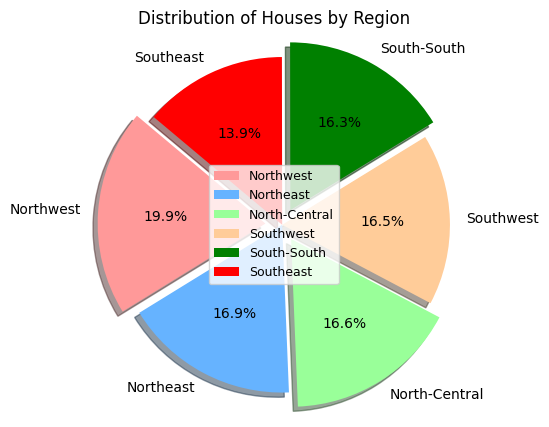

In [24]:
# Sample data for the pie chart
categories = train["region"].value_counts().index
values = train["region"].value_counts().values
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', "green","red"]
explode = (0.1, 0, 0.1, 0,0.1,0)  # To highlight the first slice

# Create a pie chart
plt.figure(figsize=(5, 5))  # Set the figure size (optional)
plt.pie(values, labels=categories, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)

# Add a title and legend
plt.title('Distribution of Houses by Region', fontsize=12)
plt.legend(categories, loc='center', fontsize=9)

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


In [25]:
def addlabels(x,y):
  for i in range(len(x)):
    plt.text(i, y[i]//2, y[i], ha = 'center')

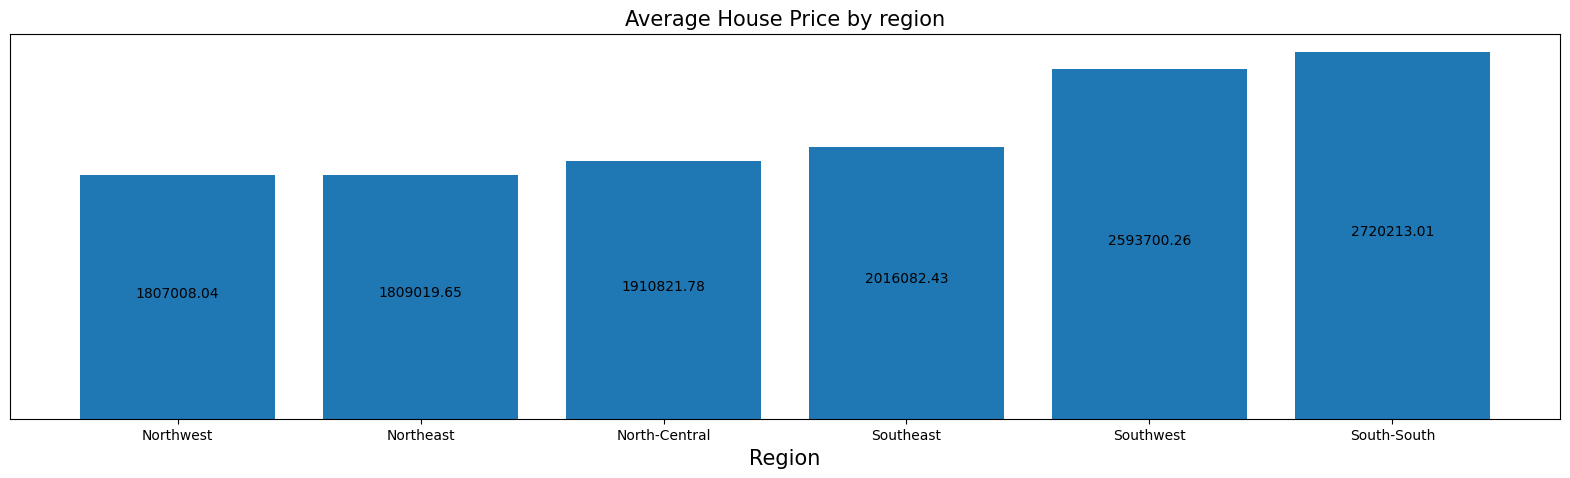

In [26]:
plt.figure(figsize = (20,5))
regionPrices = train.groupby("region")["price"].agg("mean").sort_values()
plt.bar(regionPrices.index, regionPrices.values)

# calling the function to add value labels
addlabels(regionPrices.index, regionPrices.values.round(2))
plt.gca().axes.get_yaxis().set_visible(False)
plt.title("Average House Price by region", fontsize = 15)
plt.xlabel("Region", fontsize = 15)

plt.show()

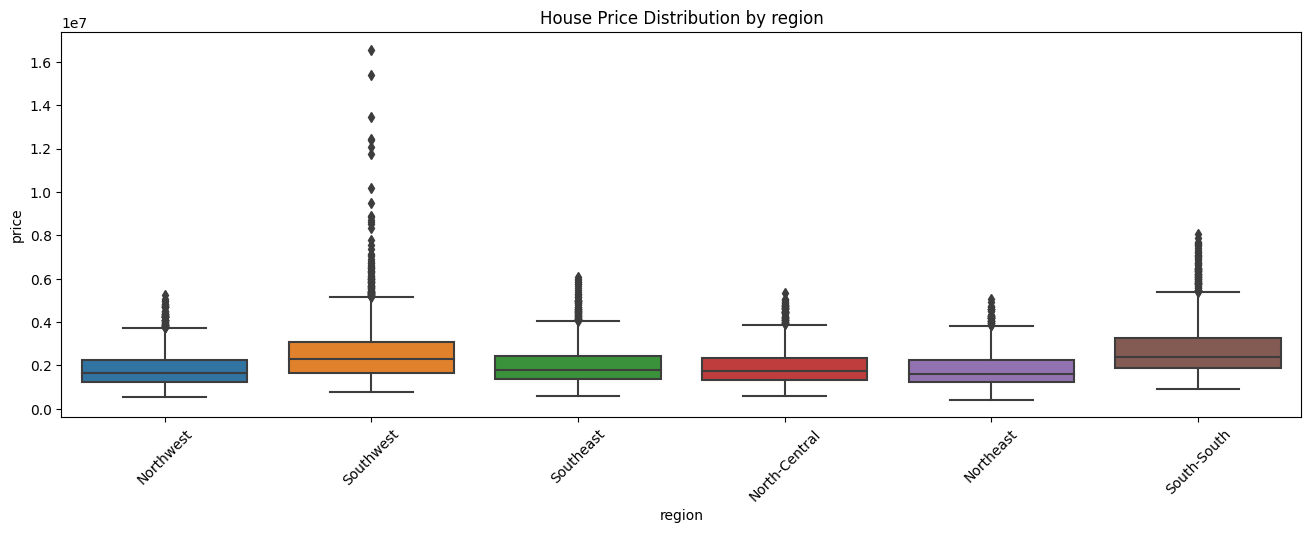

In [27]:
plt.figure(figsize=(16, 5))
plt.xticks(rotation=90)
ax = sns.boxplot(x="region", y='price', data=train)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title("House Price Distribution by region")
plt.show()

**Location**

In [28]:
train["title"].nunique()

10

In [29]:
train["title"].unique()

array(['Semi-detached duplex', 'Apartment', 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       nan, 'Flat', 'Cottage'], dtype=object)

In [30]:
train["title"].value_counts()

Flat                    1338
Apartment               1300
Townhouse               1289
Detached duplex         1278
Mansion                 1277
Penthouse               1276
Semi-detached duplex    1268
Bungalow                1254
Terrace duplex          1232
Cottage                  434
Name: title, dtype: int64

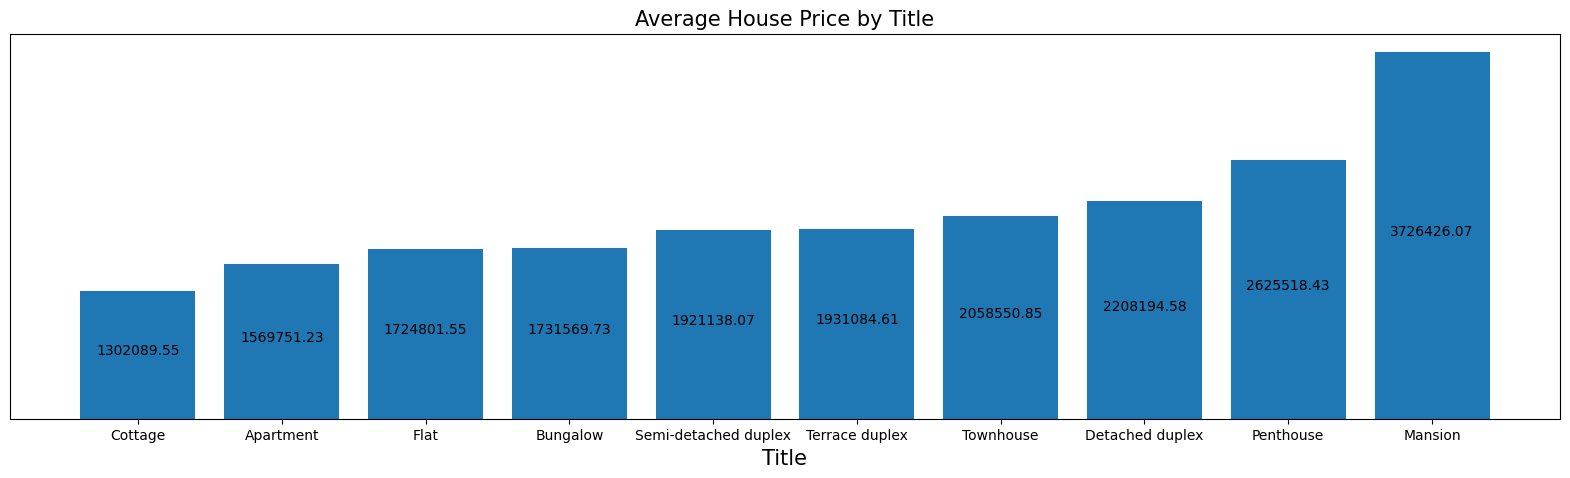

In [31]:
plt.figure(figsize = (20,5))
regionPrices = train.groupby("title")["price"].agg("mean").sort_values()
plt.bar(regionPrices.index, regionPrices.values)

# calling the function to add value labels
addlabels(regionPrices.index, regionPrices.values.round(2))
plt.gca().axes.get_yaxis().set_visible(False)
plt.title("Average House Price by Title", fontsize = 15)
plt.xlabel("Title", fontsize = 15)

plt.show()

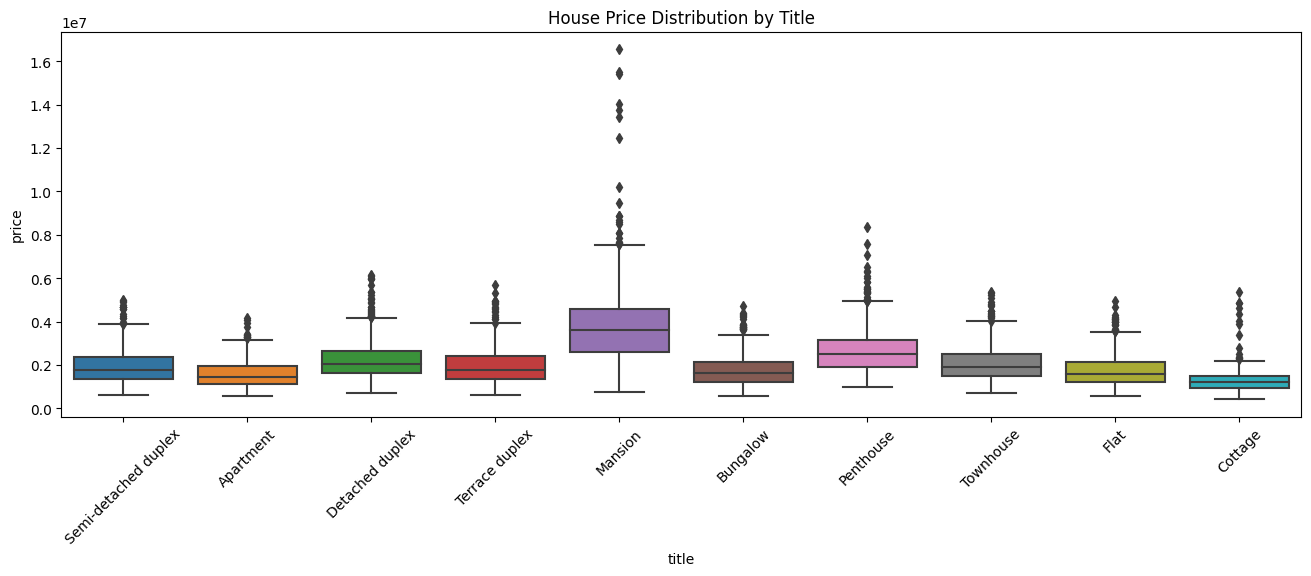

In [32]:
plt.figure(figsize=(16, 5))
plt.xticks(rotation=90)
ax = sns.boxplot(x="title", y='price', data=train)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title("House Price Distribution by Title")
plt.show()

**Numerical Variables**

In [33]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price,region
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,Northwest
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689,Southwest
2,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,Southeast
3,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898,North-Central
4,1733,Borno,Mansion,NaN,1.0,3.0,1341750.867,Northeast


**House Price**

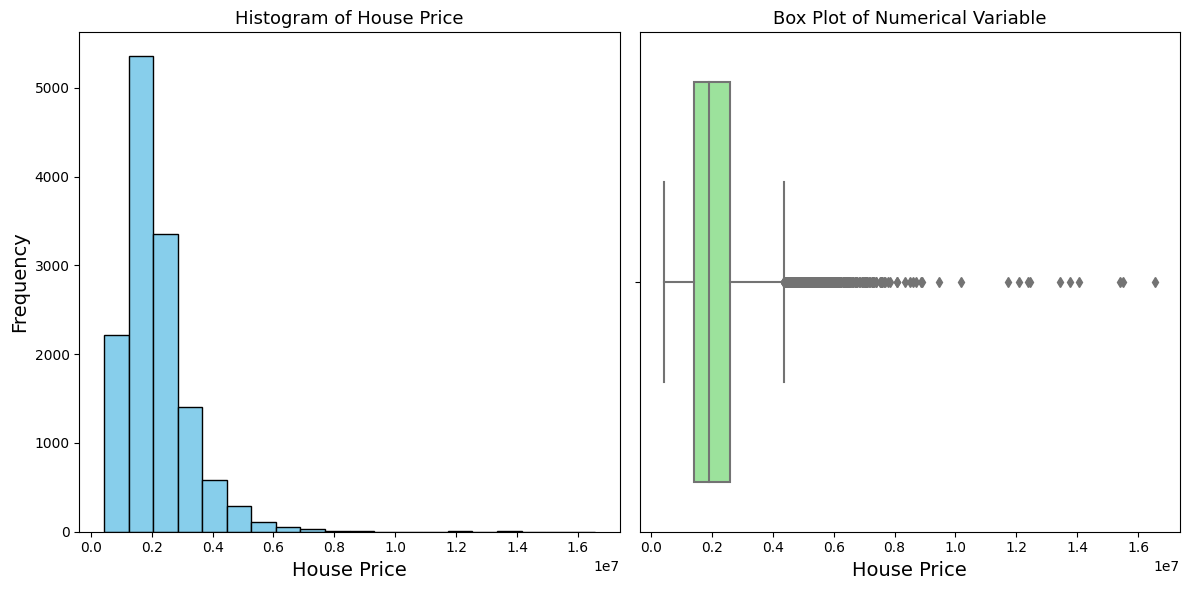

In [34]:
data  = train["price"]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('House Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of House Price', fontsize=13)

plt.subplot(1, 2, 2)
sns.boxplot(x=data, color='lightgreen')
plt.xlabel('House Price', fontsize=14)
plt.title('Box Plot of Numerical Variable', fontsize=13)

plt.tight_layout()
plt.show()


**House Price after Log Transformation**

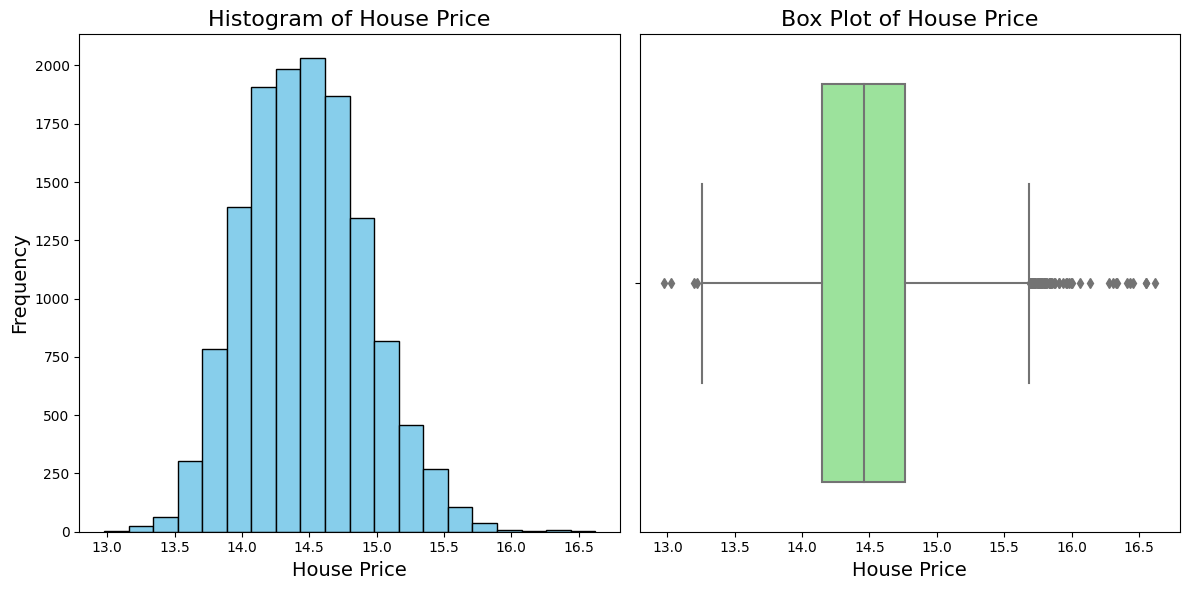

In [35]:
data  = train["price"].apply(np.log1p)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('House Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of House Price', fontsize=16)

plt.subplot(1, 2, 2)
sns.boxplot(x=data, color='lightgreen')
plt.xlabel('House Price', fontsize=14)
plt.title('Box Plot of House Price', fontsize=16)

plt.tight_layout()
plt.show()


In [36]:
train.groupby("bedroom")["price"].agg({"mean","count"})

,count,mean
bedroom,,
1.0,1678,1.413514e+06
2.0,1688,1.588508e+06
3.0,1689,1.827416e+06
4.0,1601,2.035544e+06
5.0,1741,2.224064e+06
6.0,883,2.583632e+06
7.0,868,2.785303e+06
8.0,854,3.040693e+06
9.0,858,3.292238e+06


In [37]:
train.groupby("bathroom")["price"].agg({"mean","count"})

,count,mean
bathroom,,
1.0,3180,1.876266e+06
2.0,3162,1.939878e+06
3.0,1092,2.276982e+06
4.0,1085,2.395075e+06
5.0,1117,2.379545e+06
6.0,1107,2.477640e+06
7.0,1124,2.462539e+06


In [38]:
train.groupby("parking_space")["price"].agg({"mean","count"})

,count,mean
parking_space,,
1.0,2253,2.044843e+06
2.0,2331,2.072816e+06
3.0,2312,2.077047e+06
4.0,2356,2.074647e+06
5.0,1300,2.351828e+06
6.0,1309,2.455317e+06


## **Data Cleaning**

In [39]:
#save and drop id
train_id = train["ID"]
train.drop(columns='ID',inplace=True)

test_id = test["ID"]
test.drop(columns='ID',inplace=True)

In [40]:
#select object columns
obj_col = train.columns[train.dtypes == 'object'].values

#select non object columns
num_col = train.columns[train.dtypes != 'object'].values
num_col_test = test.columns[test.dtypes != 'object'].values

**Fill Missing Values**

- **Categorical Variables**: None
- **Numerical Variables**: 0

In [41]:
#replace null value in obj columns with None
train[obj_col] = train[obj_col].fillna('None')
test[obj_col] = test[obj_col].fillna('None')

In [42]:
#replace null value in numeric columns with 0
train[num_col] = train[num_col].fillna(0)
test[num_col_test] = test[num_col_test].fillna(0)

In [43]:
train.head()

,loc,title,bedroom,bathroom,parking_space,price,region
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,Northwest
1,Ondo,Apartment,0.0,2.0,4.0,1672416.689,Southwest
2,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,Southeast
3,Kogi,Terrace duplex,0.0,5.0,6.0,2600700.898,North-Central
4,Borno,Mansion,0.0,1.0,3.0,1341750.867,Northeast


## **Feature Engineering**

**Aggregate Price Features**

In [44]:
for col in ["loc", "title"]:
  mapper = train.groupby(col)["price"].agg("mean").to_dict()

  train[f"{col}_avg"] = train[col].map(mapper)
  test[f"{col}_avg"] = test[col].map(mapper)

In [45]:
train.head(2)

,loc,title,bedroom,bathroom,parking_space,price,region,loc_avg,title_avg
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,Northwest,1.951144e+06,1.921138e+06
1,Ondo,Apartment,0.0,2.0,4.0,1672416.689,Southwest,2.270298e+06,1.569751e+06


In [46]:
test.head(2)

,loc,title,bedroom,bathroom,parking_space,region,loc_avg,title_avg
0,Kano,Penthouse,4,1,2,Northwest,2.084425e+06,2.625518e+06
1,Adamawa,Apartment,2,2,4,Northeast,1.891712e+06,1.569751e+06


**Weighted Encoding**

In [47]:
for col in ["title" , "loc"]:

  mapper = train[col].value_counts()

  train[col] = train[col].map(mapper)
  test[col] = test[col].map(mapper)

**Categorical Variables Encoding**

In [48]:
# categorical_cols = ['loc']

# encoder = OneHotEncoder(handle_unknown='ignore',drop="first",
#                         sparse=False)

# ###Train- One hot encoding#####
# dummy_train = pd.DataFrame(encoder.fit_transform((train[categorical_cols])))
# dummy_train.index = train.index
# dummy_train.columns = encoder.get_feature_names_out(categorical_cols)

# train.drop(categorical_cols, axis=1, inplace = True)
# train= pd.concat([train, dummy_train],axis=1)

# ###Test - One Hot Encoding#####
# dummy_test = pd.DataFrame(encoder.transform((test[categorical_cols])))
# dummy_test.index = test.index
# dummy_test.columns = encoder.get_feature_names_out(categorical_cols)

# test.drop(categorical_cols, axis=1, inplace = True)
# test = pd.concat([test, dummy_test],axis=1)

**Other Features**

In [49]:
train['Totalrooms'] = (train['bedroom'] + train['bathroom'])
test['Totalrooms']  = (test['bedroom']  + test['bathroom'])


train['PSBinary'] = train['parking_space'].apply(lambda x: 1 if x > 3 else 0)
test['PSBinary']  = test['parking_space'].apply(lambda x: 1 if x > 3 else 0)

train['PSBinary'] = train['parking_space'].apply(lambda x: 1 if x > 3 else 0)
test['PSBinary']  = test['parking_space'].apply(lambda x: 1 if x > 3 else 0)

train['bathroomBinary'] = train['bathroom'].apply(lambda x: 1 if x > 3 else 0)
test['bathroomBinary']  = test['bathroom'].apply(lambda x: 1 if x > 3 else 0)

train['bedroomBinary'] = train['bedroom'].apply(lambda x: 1 if x > 5 else 0)
test['bedroomBinary']  = test['bedroom'].apply(lambda x: 1 if x > 5 else 0)

In [50]:
X = train.drop(["price","region"], axis=1)
y = train["price"]

test = test.drop(["region"], axis=1)

## **Cross Validation**

In [51]:
xgb1 = XGBRegressor(**CFG.xgb_param1, random_state=47)

xgb2 = XGBRegressor(**CFG.xgb_param2, random_state=47)

xgb3 = XGBRegressor(**CFG.xgb_param3, random_state=47)

cat = CatBoostRegressor(**CFG.cat_param1, silent=True, random_state=47)

rf = RandomForestRegressor(**CFG.rf_param1 , random_state=47)

lgb_model1 = LGBMRegressor(**CFG.lgb_param1, random_state=42)

lgb_model2 = LGBMRegressor(**CFG.lgb_param2, random_state=47)

lgb_model3  = LGBMRegressor(**CFG.lgb_param3, n_estimators=1000)

models = [('xgb1',xgb1),('xgb2',xgb2),('xgb3',xgb3),("cat",cat),("rf",rf),("lgb_model1",lgb_model1),("lgb_model2",lgb_model2),("lgb_model3",lgb_model3)]

model_weights = [3,2,3,2,0.5,3,0.5,2]

In [52]:
def trainModels(train, test, target):
  train_preds = np.zeros(len(train))
  test_preds = []
  folds = KFold(n_splits=5, shuffle=True, random_state=42)
  mse_score = []

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target)):
      print(50*'-')
      print(f'Fold {fold_+1} / {5}' )
      print(50*'-')
      X_trn, X_val, X_test = train.iloc[trn_idx], train.iloc[val_idx], test
      y_trn, y_val = target.iloc[trn_idx], target.iloc[val_idx]

      ensemble = VotingRegressor(estimators=models, weights=[3,2,3,2,0.5,3,0.5,2])
      ensemble.fit(X_trn, y_trn)

      predTrain = ensemble.predict(X_val)
      train_preds[val_idx] = predTrain
      mse_score.append(rmse(y_val, predTrain))
      print(f"RMSE : {rmse(y_val, predTrain)}")

      predTest = ensemble.predict(X_test)
      test_preds.append(predTest)
      print(50*'-')

  print(f"Train RMSE : {rmse(target, train_preds)}")
  return np.mean(test_preds, 0), train_preds, mse_score

In [53]:
testpreds, trainpreds, mse_errors = trainModels(train = X,
                    test = test,
                    target = y)

--------------------------------------------------
Fold 1 / 5
--------------------------------------------------
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] bagging_freq is set=100, subsample_freq=0 will be ignored. Current value: bagging_freq=100
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.004107624022751344, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004107624022751344
[LightGBM] [Warning] bagging_fraction is set=0.7934712636944741, subsample=0.99 will be ignored. Current value: bagging_fraction=0.7934712636944741
[Li

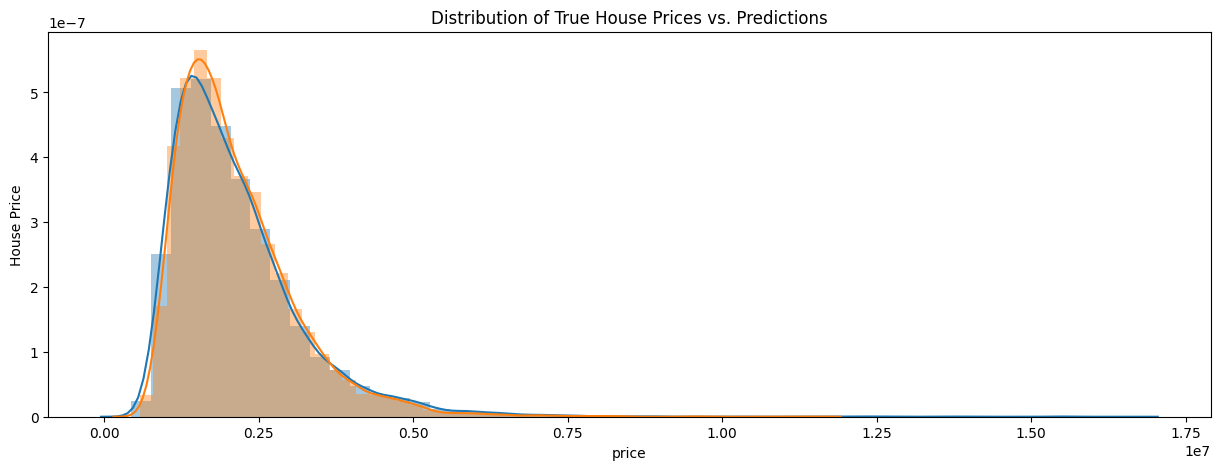

In [54]:
plt.figure(figsize=(15,5))
sns.distplot(train["price"])
sns.distplot(trainpreds)
plt.ylabel('House Price')
plt.title('Distribution of True House Prices vs. Predictions')
plt.show()

## **Modelling**

In [55]:
ensemble = VotingRegressor(estimators=models,
                           weights= model_weights)
ensemble.fit(X, np.log1p(y))

[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] bagging_freq is set=100, subsample_freq=0 will be ignored. Current value: bagging_freq=100
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.004107624022751344, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004107624022751344
[LightGBM] [Warning] bagging_fraction is set=0.7934712636944741, subsample=0.99 will be ignored. Current value: bagging_fraction=0.7934712636944741
[LightGBM] [Warning] feature_fraction is set=0.686612409641711, colsample_bytree=0.99 will be ignored. Current value

VotingRegressor(estimators=[('xgb1',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.5,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                             LGBMRegressor(bagging_fraction=0.7934712636944741,
                                           colsample_bytree=0.99,
                                           feature_fraction=0.686612409641711,
                                           lambda_l1=0.004107624022751344,
                                           lambda_l2=0.02085548700474218,
                                           learning_rate=0.03, max_depth=15,
                                           metric='rmse', min_child_samples=21,
                                           n_estimators=1000,
                                           objective='regression',
                                           random_state=42, subsample=0.99,
                                           verbose=1))],
                weights=[3, 2, 3, 2, 0.5, 3, 0.5, 2])

**Prediction**

In [56]:
prediction = ensemble.predict(test)
prediction = np.exp(prediction)

**Submission File**

In [58]:
submission = pd.DataFrame({"ID":test_id, "price":0.7*prediction + 0.3*testpreds})
submission.to_csv("Submission1.csv", index=False)
submission.head()

,ID,price
0,845,2.339075e+06
1,1924,1.026491e+06
2,10718,1.251684e+06
3,12076,8.725907e+06
4,12254,1.859194e+06
